In this notebook, I to apply different linear regression algorithms from **Skitlearn**: Lasso, Ridge and Polynomial regression. If you find it useful, it is credited to "Applied Machine Learning in Python" course designed by University of Michigan.

1) **Polynomial** regression

<IPython.core.display.Javascript object>


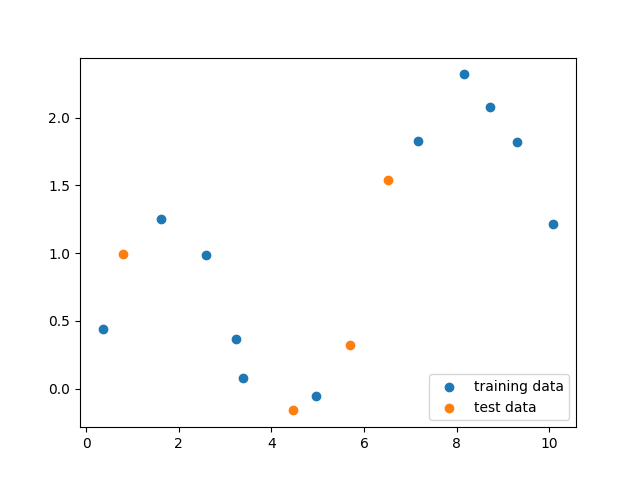

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
       
part1_scatter()

1) **Polynomial** linear regression:

Apply a Polynomial Linear regression model on the training data set for degrees of (1, 3, 6, 9) and predict the values over the interval x=0 to 10. Store the results in a numpy array in which the first row corresponds to the output from the model with degree 1 and so on.

<details>
    
See the following useful links
    
<a href="https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape">reshape(-1,1)</a>
    
<a href="https://book.pythontips.com/en/latest/enumerate.html">enumerate</a>

In [91]:
X_test = np.linspace(0,10,100)
print(X_test.shape)

# make X_test as a row vector
X_test = np.linspace(0,10,100).reshape(-1,1)
print(X_test.shape)

# reshape the training set
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
#print(X_train.shape)
#print(y_train.shape)

(100,)
(100, 1)


In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def Poly_prediction():
    answer = np.zeros((4,100))
    degrees = [1, 3, 6, 9]
    for i in range(len(degrees)):
        poly = PolynomialFeatures(degree=degrees[i])
        X_train_poly = poly.fit_transform(X_train)
        #print(X_train_poly.shape)
        LR = LinearRegression().fit(X_train_poly,y_train)
        #print(y_train.shape)
        X_test_poly = poly.fit_transform(X_test)
        y_pred = LR.predict(X_test_poly).reshape(1,-1)
        #print(y_pred.shape)
        answer[i,:] = y_pred
    return answer

Poly_prediction()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

There is a possibility to use `enumerate`.

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def Poly_prediction():
    answer = np.zeros((4,100))
    degrees = [1, 3, 6, 9]
    for counter, value in enumerate(degrees):
        poly = PolynomialFeatures(degree=value)
        X_train_poly = poly.fit_transform(X_train)
        #print(X_train_poly.shape)
        LR = LinearRegression().fit(X_train_poly,y_train)
        #print(y_train.shape)
        X_test_poly = poly.fit_transform(X_test)
        y_pred = LR.predict(X_test_poly).reshape(1,-1)
        #print(y_pred.shape)
        answer[counter,:] = y_pred
    return answer

Poly_prediction()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0